This script gives an example of how to compute gamma ray observable templates given a cluster model.

# Import

In [1]:
from matplotlib.colors import SymLogNorm
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates.sky_coordinate import SkyCoord
import astropy.units as u
from astropy.cosmology import Planck15 as cosmo
from astropy.wcs import WCS
from ClusterModel import model

# Modify plotting parameters
dict_base = {'font.size':        16,
             'legend.fontsize':  16,
             'xtick.labelsize':  16,
             'ytick.labelsize':  16,
             'axes.labelsize':   16,
             'axes.titlesize':   16,
             'figure.titlesize': 16,    
             'figure.figsize':[8.0, 6.0],
             'figure.subplot.right':0.97,
             'figure.subplot.left':0.15,
             'font.family':'serif',
             'figure.facecolor': 'white',
             'legend.frameon': True}
plt.rcParams.update(dict_base)

# Define a cluster object

### First define a cluster object, giving already some of the properties here

In [2]:
clust = model.Cluster(name='Coma', 
                      redshift=0.023, M500=7e14*u.Msun, 
                      cosmology=cosmo, silent=False, 
                      output_dir='/Users/adam/Desktop/test')

                      ___   __    ___   __   __                      
                     / __) / _\  / __) /  \ (  )                     
                    ( (__ /    \( (_ \(  O )/ (_/\                   
                     \___)\_/\_/ \___/ \__/ \____/                   
   Cluster Atmosphere modeling for Gamma-ray Observations Libraries  
---------------------------------------------------------------------
                                                                     
Setting gNFW Planck coll. (2013) UPP.


### Check what are the model parameters

In [3]:
clust.print_param() # To print the parameters in the terminal
clust.save_param()  # To write the parameters in the output directory

--- theta_truncation
    2.37848219885 deg
    <class 'astropy.units.quantity.Quantity'>
--- abundance
    0.3
    <type 'float'>
--- R_truncation
    4108.40464651 kpc
    <class 'astropy.units.quantity.Quantity'>
--- M500
    7e+14 solMass
    <class 'astropy.units.quantity.Quantity'>
--- map_reso
    0.02 deg
    <class 'astropy.units.quantity.Quantity'>
--- theta500
    0.792827399615 deg
    <class 'astropy.units.quantity.Quantity'>
--- Rmin
    1.0 kpc
    <class 'astropy.units.quantity.Quantity'>
--- magfield_model
    {'a': 1.33, 'c500': 1.81, 'c': 0.155, 'b': 2.065, 'name': 'GNFW', 'r_p': <Quantity 756.61227376 kpc>, 'P_0': <Quantity 10. uG>}
    <type 'dict'>
--- density_gas_model
    {'a': 1.33, 'c500': 1.81, 'c': 0.31, 'b': 4.13, 'name': 'GNFW', 'r_p': <Quantity 756.61227376 kpc>, 'P_0': <Quantity 0.00193462 1 / cm3>}
    <type 'dict'>
--- Epmin
    1.21793391659 GeV
    <class 'astropy.units.quantity.Quantity'>
--- pp_interaction_model
    Pythia8
    <type 'str'>
--- R500

### You can also change parameters after

In [4]:
#----- Some parameters that can be set at when defining the cluster
clust.coord = SkyCoord("194.953d  27.9806d", frame="icrs", unit="deg")

#----- Define the relevant ICM model (available models are defined in model_modpar.py)

# Density profile of the target thermal gas
clust.density_gas_model = {'name':'beta', 'n_0':3e-3*u.cm**-3, 'beta':2.0/3, 'r_c':290*u.kpc}

# Pressure profile of the target thermal gas
clust.pressure_gas_model = {'name':'GNFW', 'P_0':2.2e-2*u.keV/u.cm**3, 'c500':2.9, 'a':1.8, 'b':3.1, 'c':0.0}

# Set the cosmic ray density profile to the same shape as the thermal gas density
clust.set_density_crp_isodens_scal_param()

# Cosmic ray proton spectrum
clust.spectrum_crp_model = {'name':'PowerLaw', 'Index':2.3}

# Cosmic ray proton normalization
clust.X_crp_E = {'X':0.01, 'R_norm':clust.R500} # X is the CRp/thermal energy ratio, normalized within R_norm

Setting coord value
Setting density_gas_model value
Fixing: R500
Setting pressure_gas_model value
Fixing: R500
Setting spectrum_crp_model value
Getting R500 value
Setting cosmic ray to thermal pressure ratio value


### Check the densities

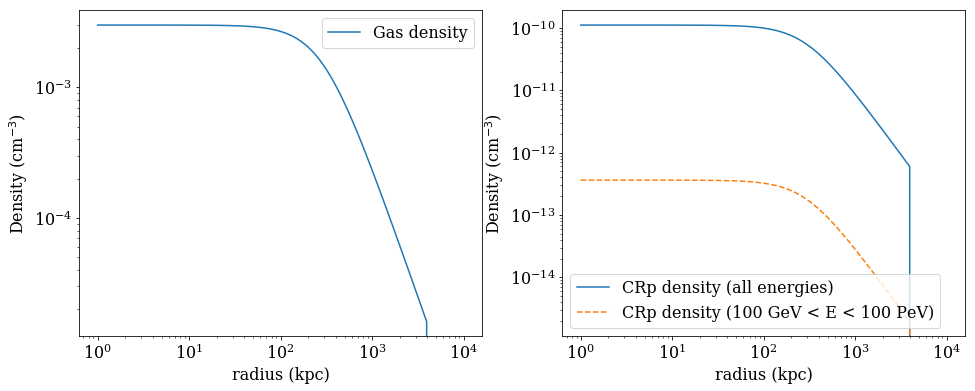

In [5]:
plt.figure(figsize=(15,6))
plt.subplot(121)
r, n_gas_r = clust.get_density_gas_profile()
plt.loglog(r, n_gas_r, label='Gas density')
plt.xlabel('radius (kpc)')
plt.ylabel('Density (cm$^{-3}$)')
plt.legend()

plt.subplot(122)
r, n_crp_r = clust.get_density_crp_profile()
plt.loglog(r, n_crp_r, label='CRp density (all energies)')
r, n_crp_r = clust.get_density_crp_profile(Emin=100*u.GeV, Emax=100*u.PeV)
plt.loglog(r, n_crp_r, '--', label='CRp density (100 GeV < E < 100 PeV)')
plt.xlabel('radius (kpc)')
plt.ylabel('Density (cm$^{-3}$)')
plt.legend()

### Check the CR to thermal energy (thermal energy is derived from pressure profile)

Getting the cosmic ray / thermal energy and normalization radius
Getting the cosmic ray / thermal energy and normalization radius
Getting the cosmic ray / thermal energy and normalization radius
Getting the cosmic ray / thermal energy and normalization radius
Getting the cosmic ray / thermal energy and normalization radius
Getting the cosmic ray / thermal energy and normalization radius


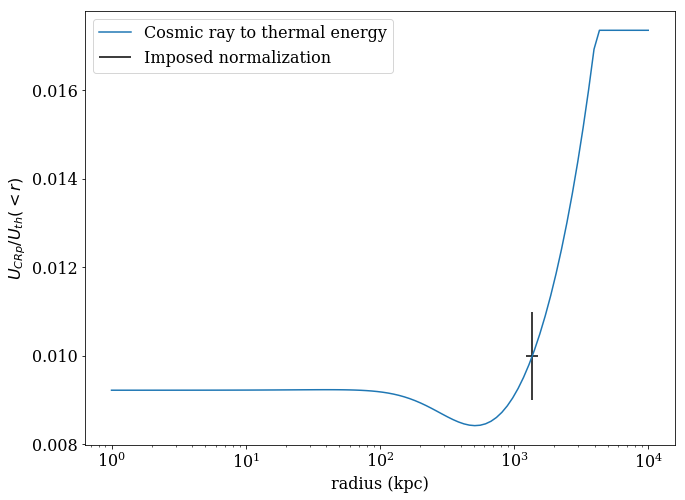

In [6]:
plt.figure(figsize=(10,8))
r, x_r = clust.get_crp_to_thermal_energy_profile(Emin=None, Emax=None)
plt.plot(r, x_r, label='Cosmic ray to thermal energy')
plt.vlines(clust.X_crp_E['R_norm'].to_value('kpc'), clust.X_crp_E['X']*0.9, clust.X_crp_E['X']*1.1, label='Imposed normalization')
plt.hlines(clust.X_crp_E['X'], clust.X_crp_E['R_norm'].to_value('kpc')*0.9, clust.X_crp_E['R_norm'].to_value('kpc')*1.1)
plt.xscale('log')
plt.xlabel('radius (kpc)')
plt.ylabel('$U_{CRp}/U_{th} (<r)$')
plt.legend()

# Extract the surface brightness profile

Getting D_ang value
Getting D_ang value


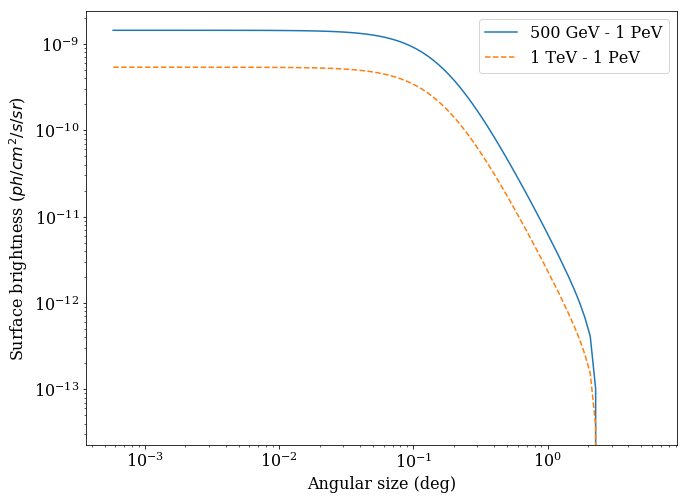

In [7]:
r1, p1 = clust.get_gamma_profile(radius=np.logspace(0,4,100)*u.kpc, 
                                   Emin=500*u.GeV, Emax=1*u.PeV, Energy_density=False)
r2, p2 = clust.get_gamma_profile(radius=np.logspace(0,4,100)*u.kpc, 
                                   Emin=1000*u.GeV, Emax=1*u.PeV, Energy_density=False)
plt.figure(0,figsize=(10,8))
plt.loglog((r1/clust.D_ang*u.rad).to('deg'),p1.to('cm-2 s-1 sr-1'), '-', label='500 GeV - 1 PeV')
plt.loglog((r2/clust.D_ang*u.rad).to('deg'),p2.to('cm-2 s-1 sr-1'), '--', label='1 TeV - 1 PeV')
plt.xlabel('Angular size (deg)')
plt.ylabel('Surface brightness ($ph/cm^2/s/sr$)')
plt.legend()

# Extract the spectrum

Getting R_truncation value
Getting R500 value
Getting R500 value


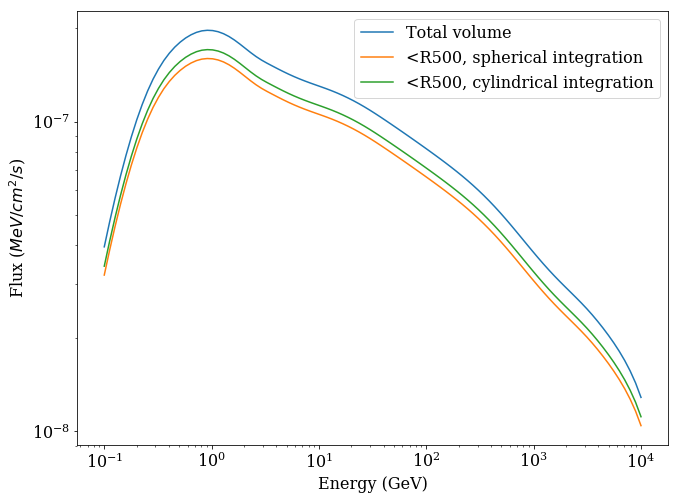

In [8]:
energy = np.logspace(-1,4,100)*u.GeV
e1, s1 = clust.get_gamma_spectrum(energy,Rmax=clust.R_truncation, type_integral='spherical')
e2, s2 = clust.get_gamma_spectrum(energy,Rmax=clust.R500, type_integral='spherical')
e3, s3 = clust.get_gamma_spectrum(energy,Rmax=clust.R500, type_integral='cylindrical')

plt.figure(0,figsize=(10,8))
plt.loglog(e1, (e1**2*s1).to('MeV cm-2 s-1'), '-', label='Total volume')
plt.loglog(e2, (e2**2*s2).to('MeV cm-2 s-1'), '-', label='<R500, spherical integration')
plt.loglog(e3, (e3**2*s3).to('MeV cm-2 s-1'), '-', label='<R500, cylindrical integration')
plt.xlabel('Energy (GeV)')
plt.ylabel('Flux ($MeV/cm^2/s$)')
plt.legend()

# Compute the gamma ray map template

In [9]:
# Defines the grid
clust.map_reso = 0.01*u.deg
clust.map_fov = 5.0*u.deg

# The center of the map can be offset wrt the cluster
clust.map_coord = SkyCoord("194.5d  27.2d", frame="icrs", unit="deg")

# Get the corresponding header
header = clust.get_map_header()

Setting the map resolution value
Setting: map_header to None, as map properties are now set by hand
Setting the map field of view
Setting: map_header to None, as map properties are now set by hand
Setting the map coordinates
Setting: map_header to None, as map properties are now set by hand


### Extract the template

In [10]:
template = clust.get_gamma_map(Emin=None, Emax=None, 
                               Energy_density=False, 
                               Normalize=True) # The map is normalized to the total flux, to be in unit of sr-1

### Check the map

Getting theta500 value
Getting theta_truncation value
Getting the coordinates
Getting the coordinates
Getting the coordinates
Getting the coordinates
Getting the coordinates
Getting the coordinates
Getting the name value


Text(0.5,1,'Coma, gamma template ($sr^{-1}$)')

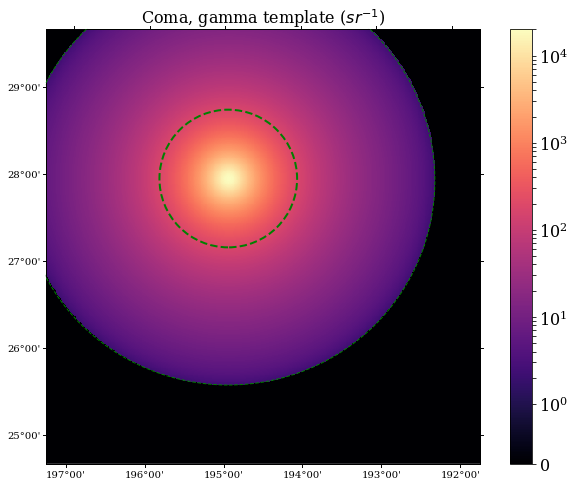

In [11]:
rad500 = clust.theta500.to_value('deg')
radtru = clust.theta_truncation.to_value('deg')

fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection=WCS(header))
plt.imshow(template, vmin=0, origin='lower', cmap='magma', norm=SymLogNorm(1))

# Show R500
circle500 = matplotlib.patches.Ellipse((clust.coord.ra.value, clust.coord.dec.value),
                                        2*rad500/np.cos(clust.coord.dec.value*np.pi/180), 2*rad500,
                                        linewidth=2, fill=False, zorder=2,
                                        edgecolor='green', linestyle='dashed',facecolor='none',
                                        transform=ax.get_transform('fk5'))
# Show R_truncation
circletru = matplotlib.patches.Ellipse((clust.coord.ra.value, clust.coord.dec.value),
                                        2*radtru/np.cos(clust.coord.dec.value*np.pi/180), 2*radtru,
                                        linewidth=1, fill=False, zorder=2,
                                        edgecolor='green', linestyle='dashed',facecolor='none',
                                        transform=ax.get_transform('fk5'))
ax.add_patch(circle500)
ax.add_patch(circletru)
plt.colorbar()
plt.title(clust.name+', gamma template ($sr^{-1}$)')

# Save outputs

In [12]:
# Save the parameters
clust.save_param()

# Save relevant output products
clust.save_spectra()
clust.save_profile()
clust.save_map()

# Can also produce plots
clust.plot(prod_list=['all'])

!!! WARNING: XSPEC_table.txt not generated, skip Xray observables
!!! WARNING: XSPEC_table.txt not generated, skip Xray observables
!!! WARNING: XSPEC_table.txt not generated, skip Xray observables
----- Plot done: gas pressure
----- Plot done: gas density
----- Plot done: gas temperature
----- Plot done: gas entropy
----- Plot done: HSE mass
----- Plot done: density contrast
----- Plot done: gas mass
----- Plot done: gas fraction
----- Plot done: thermal energy
----- Plot done: magnetic field
----- Plot done: CRp density
----- Plot done: CRp/thermal energy
----- Plot done: CRe density
----- Plot done: gamma surface brightness profile
----- Plot done: gamma integrated (R) flux
----- Plot done: neutrino surface brightness profile
----- Plot done: neutrino integrated (R) flux
----- Plot done: IC surface brightness profile
----- Plot done: IC integrated (R) flux
----- Plot done: Synchrotron surface brightness profile
----- Plot done: Synchrotron integrated (R) flux
----- Plot done: SZ Com